In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats # Many functions for probability distributions in python are in scipy.stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Loading the dataset Excel file
data=pd.read_excel('PCA India Data_Census.xlsx')

#### 1. Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.


In [3]:
data.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [5]:
data.shape

(640, 61)

In [6]:
data.describe()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,17.114062,320.500000,51222.871875,79940.576563,122372.084375,12309.098438,11942.300000,13820.946875,20778.392188,6191.807813,...,1392.973438,2757.050000,250.889062,558.098438,560.690625,1293.431250,71.379688,200.742188,510.014063,704.778125
std,9.426486,184.896367,48135.405475,73384.511114,113600.717282,11500.906881,11326.294567,14426.373130,21727.887713,9912.668948,...,1489.707052,2788.776676,453.336594,1117.642748,762.578991,1585.377936,107.897627,309.740854,610.603187,910.209225
min,1.000000,1.000000,350.000000,391.000000,698.000000,56.000000,56.000000,0.000000,0.000000,0.000000,...,4.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,9.000000,160.750000,19484.000000,30228.000000,46517.750000,4733.750000,4672.250000,3466.250000,5603.250000,293.750000,...,489.500000,957.250000,47.000000,109.000000,136.500000,298.000000,14.000000,43.000000,161.000000,220.500000
50%,18.000000,320.500000,35837.000000,58339.000000,87724.500000,9159.000000,8663.000000,9591.500000,13709.000000,2333.500000,...,949.000000,1928.000000,114.500000,247.500000,308.000000,717.000000,35.000000,113.000000,326.000000,464.500000
75%,24.000000,480.250000,68892.000000,107918.500000,164251.750000,16520.250000,15902.250000,19429.750000,29180.000000,7658.000000,...,1714.000000,3599.750000,270.750000,568.750000,642.000000,1710.750000,79.000000,240.000000,604.500000,853.500000
max,35.000000,640.000000,310450.000000,485417.000000,750392.000000,96223.000000,95129.000000,103307.000000,156429.000000,96785.000000,...,9875.000000,21611.000000,5775.000000,17153.000000,6116.000000,13714.000000,895.000000,3354.000000,6456.000000,10533.000000


In [7]:
data.dtypes

State Code        int64
Dist.Code         int64
State            object
Area Name        object
No_HH             int64
                  ...  
MARG_HH_0_3_F     int64
MARG_OT_0_3_M     int64
MARG_OT_0_3_F     int64
NON_WORK_M        int64
NON_WORK_F        int64
Length: 61, dtype: object

In [8]:
# Check for missing value in any other column

data.isna().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [9]:
data.columns

Index(['State Code', 'Dist.Code', 'State', 'Area Name', 'No_HH', 'TOT_M',
       'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT',
       'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M',
       'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F',
       'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M',
       'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F',
       'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M',
       'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M',
       'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M',
       'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M',
       'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M',
       'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M',
       'NON_WORK_F'],
      dtype='object')

In [10]:
data.shape

(640, 61)

In [11]:
data.nunique()

State Code        35
Dist.Code        640
State             35
Area Name        635
No_HH            639
                ... 
MARG_HH_0_3_F    539
MARG_OT_0_3_M    192
MARG_OT_0_3_F    320
NON_WORK_M       482
NON_WORK_F       504
Length: 61, dtype: int64

In [12]:
# Check for duplicate data

dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data[dups]


Number of duplicate rows = 0


,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F


#### 2. Perform detailed Exploratory analysis by creating certain questions like 
#### (i) Which state has highest gender ratio and which has the lowest? 
#### (ii) Which district has the highest & lowest gender ratio? (Example Questions). 
#### Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_M, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F


In [13]:
data1 = data[['State','State Code', 'Dist.Code', 'Area Name','MAINWORK_M', 'MAINWORK_F', 'M_ILL', 'F_ILL', 'MAIN_CL_M']]

In [14]:
data1.head()

,State,State Code,Dist.Code,Area Name,MAINWORK_M,MAINWORK_F,M_ILL,F_ILL,MAIN_CL_M
0,Jammu & Kashmir,1,1,Kupwara,2763,1275,10007,18432,486
1,Jammu & Kashmir,1,2,Badgam,4628,1733,9072,15211,1098
2,Jammu & Kashmir,1,3,Leh(Ladakh),1940,2923,2012,5124,519
3,Jammu & Kashmir,1,4,Kargil,491,408,942,2244,35
4,Jammu & Kashmir,1,5,Punch,2523,2267,7348,16504,743


In [15]:
PCA_state = data1.groupby('State Code')['MAINWORK_M', 'MAINWORK_F', 'M_ILL', 'F_ILL', 'MAIN_CL_M'].sum()
PCA_state.head()

,MAINWORK_M,MAINWORK_F,M_ILL,F_ILL,MAIN_CL_M
State Code,,,,,
1,117011,58644,138107,284906,21434
2,154506,148137,95536,259620,50076
3,694875,286987,407464,824806,165789
4,19671,14632,8201,16206,198
5,179573,219824,150187,384812,47307


In [16]:
PCA_state['Males'] = PCA_state['MAINWORK_M'] + PCA_state['M_ILL'] + PCA_state['MAIN_CL_M']


In [17]:
PCA_state['Females'] = PCA_state['MAINWORK_F'] + PCA_state['F_ILL']


In [18]:
PCA_state.head()

,MAINWORK_M,MAINWORK_F,M_ILL,F_ILL,MAIN_CL_M,Males,Females
State Code,,,,,,,
1,117011,58644,138107,284906,21434,276552,343550
2,154506,148137,95536,259620,50076,300118,407757
3,694875,286987,407464,824806,165789,1268128,1111793
4,19671,14632,8201,16206,198,28070,30838
5,179573,219824,150187,384812,47307,377067,604636


In [19]:
PCA_state['genderratio'] = PCA_state['Females']/PCA_state['Males']

In [20]:
PCA_state.head()

,MAINWORK_M,MAINWORK_F,M_ILL,F_ILL,MAIN_CL_M,Males,Females,genderratio
State Code,,,,,,,,
1,117011,58644,138107,284906,21434,276552,343550,1.242262
2,154506,148137,95536,259620,50076,300118,407757,1.358656
3,694875,286987,407464,824806,165789,1268128,1111793,0.876720
4,19671,14632,8201,16206,198,28070,30838,1.098611
5,179573,219824,150187,384812,47307,377067,604636,1.603524


In [21]:
PCA_state[PCA_state['genderratio']==PCA_state['genderratio'].max()]

,MAINWORK_M,MAINWORK_F,M_ILL,F_ILL,MAIN_CL_M,Males,Females,genderratio
State Code,,,,,,,,
28,1425083,2208144,901392,3418632,176565,2503040,5626776,2.247977


In [22]:
PCA_state.reset_index(inplace = True )

In [23]:
data1[data1['State Code']==28]['State'].head(1)

531    Andhra Pradesh
Name: State, dtype: object

In [24]:
PCA_state[PCA_state['genderratio']==PCA_state['genderratio'].min()]

,State Code,MAINWORK_M,MAINWORK_F,M_ILL,F_ILL,MAIN_CL_M,Males,Females,genderratio
30,31,2849,862,2222,3438,0,5071,4300,0.847959


In [25]:
data1[data1['State Code']==31]['State'].head(1)

586    Lakshadweep
Name: State, dtype: object

#### 531    Andhra Pradesh state has highest gender ratio
                                 
#### 586    Lakshadweep state has lowest gender ratio  

#### (ii) Which district has the highest & lowest gender ratio? (Example Questions). 


In [26]:
PCA_Dist = data1[['Dist.Code', 'Area Name', 'MAINWORK_M', 'MAINWORK_F', 'M_ILL', 'F_ILL', 'MAIN_CL_M']]
PCA_Dist.head()

,Dist.Code,Area Name,MAINWORK_M,MAINWORK_F,M_ILL,F_ILL,MAIN_CL_M
0,1,Kupwara,2763,1275,10007,18432,486
1,2,Badgam,4628,1733,9072,15211,1098
2,3,Leh(Ladakh),1940,2923,2012,5124,519
3,4,Kargil,491,408,942,2244,35
4,5,Punch,2523,2267,7348,16504,743


In [27]:
PCA_Dist['Males'] = PCA_Dist['MAINWORK_M'] + PCA_Dist['M_ILL'] + PCA_Dist['MAIN_CL_M']


In [28]:
PCA_Dist['Females'] = PCA_Dist['MAINWORK_F'] + PCA_Dist['F_ILL']


In [29]:
PCA_Dist.head()

,Dist.Code,Area Name,MAINWORK_M,MAINWORK_F,M_ILL,F_ILL,MAIN_CL_M,Males,Females
0,1,Kupwara,2763,1275,10007,18432,486,13256,19707
1,2,Badgam,4628,1733,9072,15211,1098,14798,16944
2,3,Leh(Ladakh),1940,2923,2012,5124,519,4471,8047
3,4,Kargil,491,408,942,2244,35,1468,2652
4,5,Punch,2523,2267,7348,16504,743,10614,18771


In [30]:
PCA_Dist['genderratio'] = PCA_Dist['Females']/PCA_Dist['Males']

In [31]:
PCA_Dist.head()

,Dist.Code,Area Name,MAINWORK_M,MAINWORK_F,M_ILL,F_ILL,MAIN_CL_M,Males,Females,genderratio
0,1,Kupwara,2763,1275,10007,18432,486,13256,19707,1.486648
1,2,Badgam,4628,1733,9072,15211,1098,14798,16944,1.145020
2,3,Leh(Ladakh),1940,2923,2012,5124,519,4471,8047,1.799821
3,4,Kargil,491,408,942,2244,35,1468,2652,1.806540
4,5,Punch,2523,2267,7348,16504,743,10614,18771,1.768513


In [32]:
PCA_Dist[PCA_Dist['genderratio']==PCA_Dist['genderratio'].max()]

,Dist.Code,Area Name,MAINWORK_M,MAINWORK_F,M_ILL,F_ILL,MAIN_CL_M,Males,Females,genderratio
394,395,Kalahandi,7584,16190,10244,48518,1442,19270,64708,3.357966


In [33]:
PCA_Dist[PCA_Dist['genderratio']==PCA_Dist['genderratio'].min()]

,Dist.Code,Area Name,MAINWORK_M,MAINWORK_F,M_ILL,F_ILL,MAIN_CL_M,Males,Females,genderratio
635,636,Mahe,3459,997,1238,1597,8,4705,2594,0.551328


#### Kalahandi district has the highest gender ratio

#### Mahe district has the lowest gender ratio


#### 3. We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?


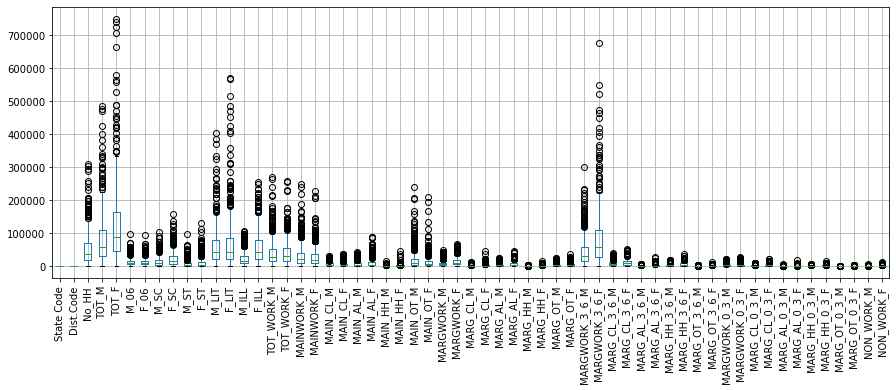

In [34]:
# To plot outliers

data.boxplot(figsize=(15,5))
plt.xticks(rotation=90)
plt.show()


#### Treatment of outlier is neccessary as there are many ouliers present in the dataset.

In [35]:
data.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


#### 4. Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.


In [36]:
# Column has unique values, present in "State', "State Code", "Dist.Code", "Area Name"
# so, it should be removed from the dataset.

data=data.drop(["State", "State Code","Dist.Code","Area Name"],axis=1)
data

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,114,188,44,89,3,34,0,4,67,61
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,194,247,61,128,13,50,4,10,116,59
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,874,1928,465,1043,205,302,24,105,180,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,3333,8154,11781,1146,1203,21,30,0,0,6916,...,32,47,0,0,0,0,0,0,32,47
636,10612,12346,21691,1544,1533,2234,4155,0,0,10292,...,155,337,3,14,38,130,4,23,110,170
637,1275,1549,2630,227,225,0,0,1012,1750,1187,...,104,134,9,4,2,6,17,47,76,77
638,3762,5200,8012,723,664,0,0,28,50,4206,...,136,172,24,44,11,21,1,4,100,103


In [37]:
# Scales the data. Essentially returns the z-scores of every attribute

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [38]:
# All variables must be on same scale, hence we can omit scaling.
# Standardization

from scipy.stats import zscore
data=data.apply(zscore)
data.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


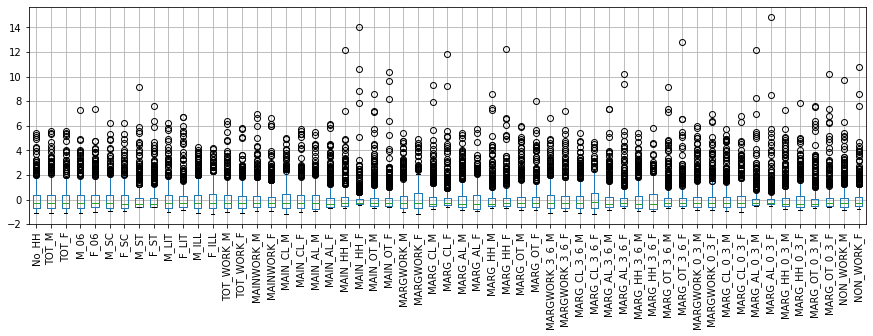

In [39]:
# Plotting boxplot to detect outliers in dataset

data.boxplot(figsize=(15,4))
plt.xticks(rotation=90)
plt.show()

#### 5. Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.


In [40]:
# PCA
# Step 1 - To Create covariance matrix

cov_matrix = np.cov(data.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00156495 0.91760364 0.97210871 ... 0.53769433 0.76357722 0.73684378]
 [0.91760364 1.00156495 0.98417823 ... 0.5891007  0.84621844 0.71718181]
 [0.97210871 0.98417823 1.00156495 ... 0.572748   0.82894851 0.74775097]
 ...
 [0.53769433 0.5891007  0.572748   ... 1.00156495 0.61052325 0.52191235]
 [0.76357722 0.84621844 0.82894851 ... 0.61052325 1.00156495 0.88228018]
 [0.73684378 0.71718181 0.74775097 ... 0.52191235 0.88228018 1.00156495]]


In [41]:
# Even if we take the transpose of the covariance matrix it results in same value as that of the above

cov_matrix = np.cov(data.T).T
print('Covariance Matrix \n', cov_matrix)


Covariance Matrix 
 [[1.00156495 0.91760364 0.97210871 ... 0.53769433 0.76357722 0.73684378]
 [0.91760364 1.00156495 0.98417823 ... 0.5891007  0.84621844 0.71718181]
 [0.97210871 0.98417823 1.00156495 ... 0.572748   0.82894851 0.74775097]
 ...
 [0.53769433 0.5891007  0.572748   ... 1.00156495 0.61052325 0.52191235]
 [0.76357722 0.84621844 0.82894851 ... 0.61052325 1.00156495 0.88228018]
 [0.73684378 0.71718181 0.74775097 ... 0.52191235 0.88228018 1.00156495]]


In [42]:
# Comparing Correlation and Covariance Matrix
# Now without Scaling lets check out correlation matrix

df_corr = data.copy()
df_corr.corr()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
No_HH,1.000000,0.916170,0.970590,0.797559,0.796373,0.775309,0.823847,0.149627,0.165102,0.931938,...,0.556941,0.555543,0.067425,0.046128,0.368591,0.417447,0.486747,0.536854,0.762384,0.735692
TOT_M,0.916170,1.000000,0.982640,0.950825,0.947792,0.839925,0.826299,0.091421,0.086180,0.989312,...,0.698310,0.595696,0.167405,0.115580,0.495928,0.440360,0.651604,0.588180,0.844896,0.716061
TOT_F,0.970590,0.982640,1.000000,0.907975,0.906557,0.816959,0.832756,0.123626,0.128646,0.985441,...,0.655347,0.598951,0.138763,0.099438,0.451011,0.443132,0.593805,0.571853,0.827653,0.746583
M_06,0.797559,0.950825,0.907975,1.000000,0.998151,0.781120,0.747530,0.055274,0.043948,0.912757,...,0.760610,0.646998,0.266674,0.198338,0.601090,0.514055,0.690601,0.565030,0.784961,0.651143
F_06,0.796373,0.947792,0.906557,0.998151,1.000000,0.773135,0.741686,0.065138,0.054662,0.907641,...,0.763614,0.649834,0.258670,0.189568,0.611568,0.523270,0.698636,0.574178,0.783727,0.651439
M_SC,0.775309,0.839925,0.816959,0.781120,0.773135,1.000000,0.985071,-0.045666,-0.047825,0.818484,...,0.673633,0.569579,0.184332,0.129750,0.523450,0.461898,0.664918,0.591437,0.735399,0.580020
F_SC,0.823847,0.826299,0.832756,0.747530,0.741686,0.985071,1.000000,-0.014122,-0.009190,0.814150,...,0.650455,0.585690,0.163427,0.116228,0.508006,0.488657,0.628470,0.589346,0.720099,0.600089
M_ST,0.149627,0.091421,0.123626,0.055274,0.065138,-0.045666,-0.014122,1.000000,0.988047,0.090541,...,0.122967,0.196571,0.027219,0.007077,0.126336,0.238813,-0.005482,0.090123,0.122986,0.146954
F_ST,0.165102,0.086180,0.128646,0.043948,0.054662,-0.047825,-0.009190,0.988047,1.000000,0.087375,...,0.121411,0.216741,0.017205,0.002556,0.136396,0.273307,-0.005880,0.099984,0.114131,0.150869
M_LIT,0.931938,0.989312,0.985441,0.912757,0.907641,0.818484,0.814150,0.090541,0.087375,1.000000,...,0.652507,0.560065,0.144067,0.101355,0.421762,0.381727,0.600120,0.552371,0.852199,0.738672


In [43]:
# So, With standardisation (Without standardisation also, correlation matrix yields same result)

data.corr()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
No_HH,1.000000,0.916170,0.970590,0.797559,0.796373,0.775309,0.823847,0.149627,0.165102,0.931938,...,0.556941,0.555543,0.067425,0.046128,0.368591,0.417447,0.486747,0.536854,0.762384,0.735692
TOT_M,0.916170,1.000000,0.982640,0.950825,0.947792,0.839925,0.826299,0.091421,0.086180,0.989312,...,0.698310,0.595696,0.167405,0.115580,0.495928,0.440360,0.651604,0.588180,0.844896,0.716061
TOT_F,0.970590,0.982640,1.000000,0.907975,0.906557,0.816959,0.832756,0.123626,0.128646,0.985441,...,0.655347,0.598951,0.138763,0.099438,0.451011,0.443132,0.593805,0.571853,0.827653,0.746583
M_06,0.797559,0.950825,0.907975,1.000000,0.998151,0.781120,0.747530,0.055274,0.043948,0.912757,...,0.760610,0.646998,0.266674,0.198338,0.601090,0.514055,0.690601,0.565030,0.784961,0.651143
F_06,0.796373,0.947792,0.906557,0.998151,1.000000,0.773135,0.741686,0.065138,0.054662,0.907641,...,0.763614,0.649834,0.258670,0.189568,0.611568,0.523270,0.698636,0.574178,0.783727,0.651439
M_SC,0.775309,0.839925,0.816959,0.781120,0.773135,1.000000,0.985071,-0.045666,-0.047825,0.818484,...,0.673633,0.569579,0.184332,0.129750,0.523450,0.461898,0.664918,0.591437,0.735399,0.580020
F_SC,0.823847,0.826299,0.832756,0.747530,0.741686,0.985071,1.000000,-0.014122,-0.009190,0.814150,...,0.650455,0.585690,0.163427,0.116228,0.508006,0.488657,0.628470,0.589346,0.720099,0.600089
M_ST,0.149627,0.091421,0.123626,0.055274,0.065138,-0.045666,-0.014122,1.000000,0.988047,0.090541,...,0.122967,0.196571,0.027219,0.007077,0.126336,0.238813,-0.005482,0.090123,0.122986,0.146954
F_ST,0.165102,0.086180,0.128646,0.043948,0.054662,-0.047825,-0.009190,0.988047,1.000000,0.087375,...,0.121411,0.216741,0.017205,0.002556,0.136396,0.273307,-0.005880,0.099984,0.114131,0.150869
M_LIT,0.931938,0.989312,0.985441,0.912757,0.907641,0.818484,0.814150,0.090541,0.087375,1.000000,...,0.652507,0.560065,0.144067,0.101355,0.421762,0.381727,0.600120,0.552371,0.852199,0.738672


#### Covariance indicates the direction of the linear relationship between variables. Correlation on the other hand measures both the strength and direction of the linear relationship between two variables.Correlation is a function of the covariance. You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values.

#### We can state that above three approaches yield the same eigenvectors and eigenvalue pairs:

#### Eigen decomposition of the covariance matrix after standardizing the data.

#### Eigen decomposition of the correlation matrix.

#### Eigen decomposition of the correlation matrix after standardizing the data.

#### Finally we can say that after scaling - the covariance and the correlation have the same values



In [44]:
#Find the Cumulative Variance explanation of Eigenvalues

from statsmodels.multivariate.pca import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 18 to 4)

pc = PCA(data, 
         ncomp=18,
         standardize=True, 
         demean=True, 
         normalize=True, 
         gls=False, 
         weights=None, 
         method='svd', 
         missing=None)


In [45]:
eig_vals= pc.eigenvals


In [46]:
pc.eigenvecs


,eigenvec_00,eigenvec_01,eigenvec_02,eigenvec_03,eigenvec_04,eigenvec_05,eigenvec_06,eigenvec_07,eigenvec_08,eigenvec_09,eigenvec_10,eigenvec_11,eigenvec_12,eigenvec_13,eigenvec_14,eigenvec_15,eigenvec_16,eigenvec_17
0,0.156021,-0.126347,-0.002690,0.125293,-0.007022,0.004083,-0.118110,0.057238,-0.004265,0.019985,-0.010592,0.086193,-0.104175,0.028892,0.057320,-0.022263,-0.079278,-0.132798
1,0.167118,-0.089677,0.056698,0.019942,-0.033026,-0.073389,0.089554,0.111431,-0.018872,-0.024501,-0.011145,0.018850,-0.035665,-0.052947,-0.020008,0.039004,0.002663,0.027645
2,0.165553,-0.104912,0.038749,0.070873,-0.012847,-0.043647,-0.002124,0.088355,-0.014911,-0.038041,-0.007734,0.093551,-0.056325,-0.011802,-0.009791,0.023951,-0.092152,-0.036567
3,0.162193,-0.022095,0.057788,-0.011917,-0.050248,-0.157957,0.165067,0.169595,0.056773,-0.153574,-0.081252,0.104353,0.018338,-0.081818,-0.221402,-0.060763,-0.087626,0.050438
4,0.162566,-0.020271,0.050126,-0.014844,-0.043848,-0.154436,0.169082,0.169459,0.059323,-0.169567,-0.081964,0.105280,0.014711,-0.048778,-0.206328,-0.077683,-0.085937,0.032421
5,0.151358,-0.045111,0.002569,-0.012485,-0.173007,-0.064295,-0.001566,-0.129301,-0.037480,0.448517,0.228821,-0.076365,0.179625,-0.106286,-0.338113,-0.031750,0.013473,-0.083043
6,0.151567,-0.051924,-0.025101,0.029893,-0.159803,-0.040518,-0.084658,-0.144352,-0.041232,0.446968,0.213023,-0.010991,0.177701,-0.065357,-0.306221,-0.014736,-0.080300,-0.150008
7,0.027234,0.027679,-0.123504,0.222247,0.433163,0.222591,0.405505,0.021982,-0.018632,0.160418,-0.067589,0.014766,0.088277,-0.005349,-0.062353,-0.030436,-0.022953,-0.006822
8,0.028183,0.030223,-0.139769,0.229754,0.438792,0.225531,0.357800,0.014873,-0.043866,0.134862,-0.053348,0.022340,0.054592,-0.038436,-0.083867,-0.013036,-0.026500,-0.012962
9,0.161993,-0.115355,0.082168,0.035163,-0.009101,-0.055465,0.045934,0.099423,-0.045193,-0.005752,0.030219,0.075910,-0.045563,-0.076727,0.029343,0.159053,-0.083608,-0.017426


#### 6. Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.


In [47]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)


Cumulative Variance Explained [ 56.17644202  70.07228341  77.40637792  83.88473402  87.78102084
  91.20362988  93.2805193   94.60691718  95.69651164  96.62938616
  97.38838275  98.012488    98.53545311  99.03212993  99.3714434
  99.6120655   99.81228833 100.        ]


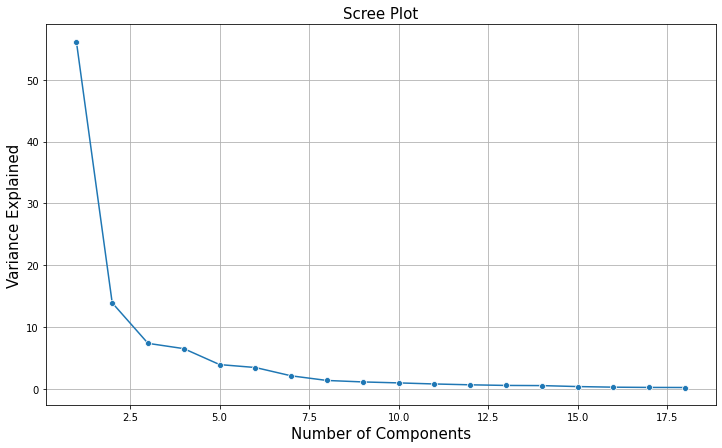

In [48]:
# Scree plot

plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

#### From the above plot it is observed that there is steep drop in varaiance, with increase in Number of PC' components

#### We will proceed with 4 components here. But depending on requirement 90% variation or 5 components will also do good

#### 7. Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.


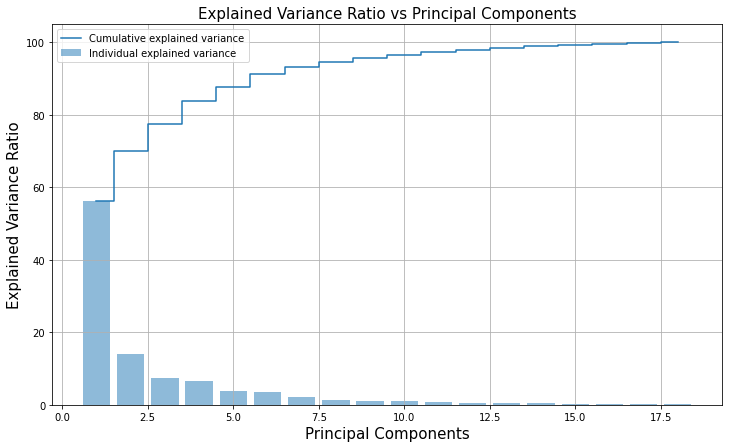

In [49]:
# Plot Cumulative explained variance and individual explained variance vs Principal Components
# Ploting 

plt.figure(figsize=(12 ,7))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [50]:
# Use PCA from statsmodels and find the Principal Components.
from statsmodels.multivariate.pca import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 18 to 4)

pc = PCA(data, 
         ncomp=4,
         standardize=True, 
         demean=True, 
         normalize=True, 
         gls=False, 
         weights=None, 
         method='svd', 
         missing=None)


In [51]:
df_comp = pc.loadings.T
df_comp

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
comp_0,0.156021,0.167118,0.165553,0.162193,0.162566,0.151358,0.151567,0.027234,0.028183,0.161993,...,0.150126,0.140157,0.052542,0.041786,0.121840,0.116011,0.139869,0.132192,0.150376,0.131066
comp_1,-0.126347,-0.089677,-0.104912,-0.022095,-0.020271,-0.045111,-0.051924,0.027679,0.030223,-0.115355,...,0.150681,0.180690,0.251328,0.240720,0.185277,0.180616,0.084869,0.050813,-0.065365,-0.073847
comp_2,-0.002690,0.056698,0.038749,0.057788,0.050126,0.002569,-0.025101,-0.123504,-0.139769,0.082168,...,0.054892,0.023982,0.268330,0.284956,-0.138628,-0.202198,-0.022599,-0.078720,0.111827,0.102553
comp_3,0.125293,0.019942,0.070873,-0.011917,-0.014844,-0.012485,0.029893,0.222247,0.229754,0.035163,...,-0.087433,0.022290,0.104686,0.135716,-0.132544,-0.004051,-0.230038,-0.206201,-0.084854,-0.021124


In [52]:
factors = pc.factors
factors

,comp_0,comp_1,comp_2,comp_3
0,-0.032384,0.001948,0.006377,-0.031882
1,-0.033467,-0.001493,0.004745,-0.040547
2,-0.041835,-0.004151,0.007131,-0.012796
3,-0.044051,-0.007056,0.004129,-0.022192
4,-0.031411,0.012609,0.020930,-0.011061
...,...,...,...,...
635,-0.043920,-0.012049,0.004709,-0.024249
636,-0.040453,-0.012698,0.003262,-0.022776
637,-0.044148,-0.008999,0.002086,-0.028257
638,-0.043647,-0.009481,0.005267,-0.023617


In [53]:
# Use PCA from sklearn's decomposition class and find Principal Components
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 18 to 4)

pca = PCA()
data_reduced = pca.fit_transform(data)
data_reduced.transpose()


array([[-4.61726348e+00, -4.77166187e+00, -5.96483558e+00, ...,
        -6.29462500e+00, -6.22319199e+00, -5.89623627e+00],
       [ 1.38115857e-01, -1.05865351e-01, -2.94346892e-01, ...,
        -6.38126644e-01, -6.72319673e-01, -9.37169526e-01],
       [ 3.28544953e-01,  2.44448976e-01,  3.67393453e-01, ...,
         1.07482817e-01,  2.71325467e-01,  3.49218364e-01],
       ...,
       [-6.06029097e-16,  2.27457842e-16,  4.15150177e-16, ...,
         3.45399264e-16, -1.01201345e-15, -6.19779140e-17],
       [ 6.08748032e-16,  1.68484483e-16, -4.48318483e-17, ...,
         1.72137876e-16, -4.66369483e-16,  3.72269309e-16],
       [ 2.96207163e-16,  4.64305393e-16,  8.23349729e-16, ...,
        -4.11830008e-16,  1.55035951e-16, -5.80404880e-16]])

In [54]:
print(pca.components_)

[[ 0.15602058  0.16711763  0.16555318 ...  0.13219224  0.15037558
   0.1310662 ]
 [-0.12634653 -0.08967655 -0.10491237 ...  0.05081332 -0.06536455
  -0.07384742]
 [-0.00269025  0.05669762  0.03874947 ... -0.07871987  0.11182732
   0.1025525 ]
 ...
 [ 0.          0.2077636   0.24647657 ... -0.07217993  0.00399206
  -0.06929081]
 [ 0.          0.2887035  -0.20596721 ...  0.04019745 -0.03192722
   0.00778048]
 [-0.          0.18790022  0.02642675 ... -0.02597314 -0.13972835
  -0.02147533]]


In [55]:
pca.explained_variance_


array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
      

In [56]:
pca.explained_variance_ratio_


array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
      

In [57]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features


array([55.7, 69.5, 76.8, 83.2, 87.1, 90.5, 92.6, 93.9, 95. , 95.9, 96.7,
       97.3, 97.8, 98.3, 98.6, 98.8, 99. , 99.2, 99.4, 99.5, 99.6, 99.7,
       99.8, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9,
       99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9,
       99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9,
       99.9, 99.9])

In [58]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 18 to 4)

pca = PCA(n_components=4)
data_reduced = pca.fit_transform(data)
data_reduced.transpose()


array([[-4.61726348, -4.77166187, -5.96483558, ..., -6.294625  ,
        -6.22319199, -5.89623627],
       [ 0.13811586, -0.10586535, -0.29434689, ..., -0.63812664,
        -0.67231967, -0.93716953],
       [ 0.32854495,  0.24444898,  0.36739345, ...,  0.10748282,
         0.27132547,  0.34921836],
       [ 1.54369713,  1.96321485,  0.61954266, ...,  1.36818698,
         1.14349289,  1.11486113]])

In [59]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features


array([55.7, 69.5, 76.8, 83.2])

#### The Cumulative % gives the percentage of variance accounted for by the n components. For example, the cumulative percentage for the second component is the sum of the percentage of variance for the first and second components. It helps in deciding the number of components by selecting the components which explained the high variance.                                   

#### In the above array we see that the first feature explains 55.7% of the variance within our data set while the second explain 69.5 and so on. If we employ 4 features we capture ~ 83.2% of the variance within the dataset, thus we gain very little by implementing an additional feature (think of this as diminishing marginal return on total variance explained).

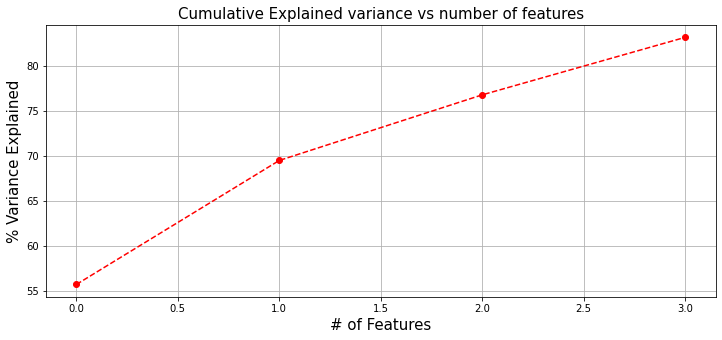

In [60]:
plt.figure(figsize=(12,5))
plt.plot(var, marker='o',linestyle='--',color='red')
plt.ylabel('% Variance Explained',fontsize=15)
plt.xlabel('# of Features',fontsize=15)
plt.title('Cumulative Explained variance vs number of features',fontsize=15)
plt.grid()
plt.show()


In [61]:
# Correlation between components and features

df_comp = pd.DataFrame(pca.components_,columns=list(data))
df_comp.head()


,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,0.156021,0.167118,0.165553,0.162193,0.162566,0.151358,0.151567,0.027234,0.028183,0.161993,...,0.150126,0.140157,0.052542,0.041786,0.121840,0.116011,0.139869,0.132192,0.150376,0.131066
1,-0.126347,-0.089677,-0.104912,-0.022095,-0.020271,-0.045111,-0.051924,0.027679,0.030223,-0.115355,...,0.150681,0.180690,0.251328,0.240720,0.185277,0.180616,0.084869,0.050813,-0.065365,-0.073847
2,-0.002690,0.056698,0.038749,0.057788,0.050126,0.002569,-0.025101,-0.123504,-0.139769,0.082168,...,0.054892,0.023982,0.268330,0.284956,-0.138628,-0.202198,-0.022599,-0.078720,0.111827,0.102553
3,-0.125293,-0.019942,-0.070873,0.011917,0.014844,0.012485,-0.029893,-0.222247,-0.229754,-0.035163,...,0.087433,-0.022290,-0.104686,-0.135716,0.132544,0.004051,0.230038,0.206201,0.084854,0.021124


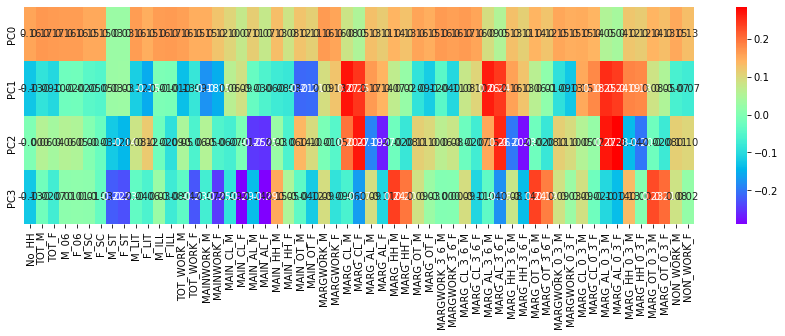

In [62]:
# Plot heatmap

plt.figure(figsize=(15,4))
sns.heatmap(df_comp,cmap='rainbow',annot=True,fmt='.2f',yticklabels=['PC0','PC1','PC2','PC3'])
plt.show()


#### Inferences from the above Heatmap                                                            ******************************

#### This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself
#### Component 2 looks more related to aspect - We can label it as aspect property
#### Depending on relations ship, we could go ahead and label relationship with features


#### 8. Write linear equation for first PC.


In [63]:
# Print first 4 pcs
data.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


In [64]:
# Print first 4 PCs
pc_df_pcafunc = pd.DataFrame(np.round(pca.components_,2),index=pc_comps,columns=std_places.columns)
pc_df_pcafunc.head(5)

NameError: name 'pc_comps' is not defined

In [ ]:
PC1 = 0.15602058 * No_HH + 0.16711763 * TOT_M + 0.16555318 * TOT_F ...  
